# Comparing Performances of Classifiers in Determining Mushroom Edibility

Defne Aydin, dga264

Timur Gordon, tbg252

## Table of Contents
- Import Modules
- Load Data
- Preprocessing
- Initial Visual Exploratory Data Analysis
  - Preprocessing Dataframe for Visualization
  - Plots
- Classifier Comparison Using All Features
  - Logistic Regression
  - Support Vector Machine
  - Decision Tree
  - K Nearest Neighbors
  - Random Forest Classifier
- Feature Selection
- Visual Exploratory Data Analysis of Selected Features
- Classifier Comparison Using Selected Features
  - Logistic Regression
  - Support Vector Machine
  - Decision Tree
  - K Nearest Neighbors
  - Random Forest Classifier
- Results
- Conclusion

# Import Modules

We used the numpy module for matrix operations, the pandas module for dataframes, and the sklearn module for the classifiers. Matplotlib and seaborn modules were used for visualization.

In [0]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, neighbors, metrics
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

# Load the Data
The data for this project is taken from the UCI Machine learning repository.

The dataset is taken from:
https://archive.ics.uci.edu/ml/datasets/Mushroom

The dataset contains information about 23 mushrooms species. It's impossible to generate a simple rule that determines whether the mushroom is poisonous or not. By using machine learning tools, we can develop a classifier that identifies poisonous or safe mushrooms by 22 descriptive features.
The target variables are definitely poisonous, definitely edible and unknown. The unknown class is combined with the definitely poisonous class in order to avoid false negatives that would pose a safety risk.

In [0]:
base_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/'
data_url = base_url + 'agaricus-lepiota.data'
names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
         'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
         'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
         'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 
         'spore-print-color', 'population', 'habitat']
df = pd.read_csv(data_url, delimiter=',', header=None, names=names)

# Some values in stalk-root are missing as indicated by '?'
# These values are removed from the dataset
df = df[df['stalk-root'] != '?']


# Preprocessing

The data requires preprocessing for classification algorithms, as the attribute values are categorical nominal values. Therefore, the following code is used to transform nominal values into numeric encodings, such that each alphabetic value for a given attribute is transformed into a binary feature. As a result, this step of preproccessing increases the attribute number from 22 to 98.

In [3]:
yraw = np.array(df["class"])
poisonous_val = 'p'
edible_val = 'e'
y = (yraw == edible_val).astype(int)
Ipoisonous = 0
Iedible = 1
# Need to transform nominal values into numeric encodings
# For each possible value per class, we will provide a binary feature
xnames = names[1:]
X = df.loc[:, xnames]
X_encoded = pd.get_dummies(X)

# Scale
Xs = preprocessing.scale(X_encoded)

# Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xs, y, test_size=0.3, stratify=y)
X_encoded.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_p,gill-color_r,gill-color_u,...,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_r,spore-print-color_u,spore-print-color_w,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


# Initial Visual Exploratory Data Analysis

## Preprocessing for data visualization
The data must be preproccessed in order to visualize it, as the attribute values are characters rather than numbers. The following code preprocesses a seperate copy of the dataframe by assigning numbers to the attribute values. The prepocessing for visualization and model training are separate.

In [0]:
# Preprocessed dataframe for violin plot
df_violin = copy.deepcopy(df)
label_encoder = LabelEncoder()
for column in df_violin.columns:
    df_violin[column] = label_encoder.fit_transform(df_violin[column])
df_violin = df_violin.drop(["veil-type"],axis=1)

# Preprocessed dataframe for TSNE scatter plot
model = TSNE(learning_rate = 100)
tsne_data = model.fit_transform(X_encoded.values)
tsne_x = tsne_data[:,0]
tsne_y = tsne_data[:,1]
df_tSNE = pd.DataFrame({"x" : tsne_x, "y" : tsne_y})

## Plots

The bar plot below visualizes the sample population in each class after dropping samples with missing values. A majority of samples are shown to be edible.

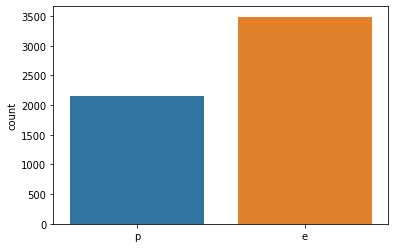

In [5]:
class_size_plot = sns.countplot(x=yraw, data=df)

The violin plot created using the seaboard module allows us to visualize the features' implication on the target variable. 0, shown in red, denotes the class of poisonous mushrooms. 1, shown in green, denotes the class of edible mushrooms. The less symetrically shaped features, such as odor and spore print color, suggest that the value of the feature is significant at determining whether the mushroom is edible or poisonous. On the other hand, features with near perfect symetry such as cap shape and cap surface provide less insight into whether a mushroom is edible or poisonous.

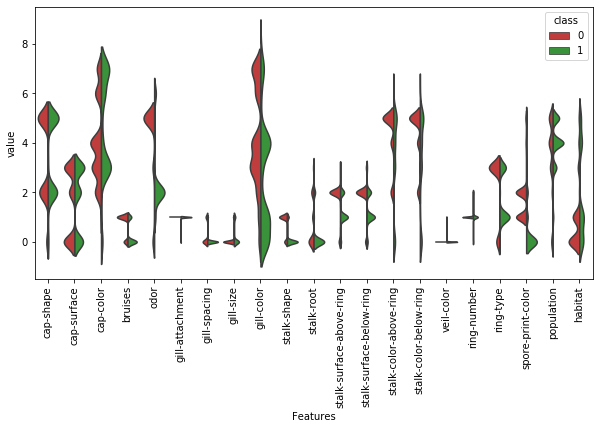

In [6]:
# Violin plot using seaboard module
df_melt = pd.melt(df_violin, "class", var_name="Features")
fig, ax = plt.subplots(figsize=(10,5))
violin_plt = sns.violinplot(ax = ax, x="Features", y="value", hue="class", split = True, data=df_melt, inner=None, palette=sns.color_palette(["tab:red", "tab:green"]))
df_x = df_violin.drop(["class"],axis = 1)
violin_plt.set_xticklabels(rotation = 90, labels = list(df_x.columns));


A t-Distributed Stochastic Neighbor Embedding (t-SNE) scatter plot allows us to visualize the dataframe consisting of 98 features. The seperable discrete chunks of classes indicate that the dataset is easily clusterable, and that classifiers will likely achieve perfect accuracy given 98 features. 

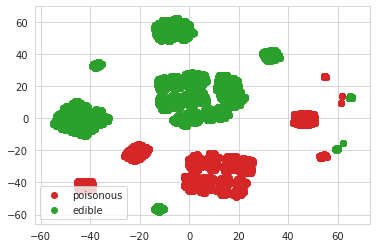

In [36]:
# tSNE scatter plot using matplotlib
plt.scatter(df_tSNE.loc[y==0]['x'], df_tSNE.loc[y ==0]['y'], c= 'tab:red')
plt.scatter(df_tSNE.loc[y ==1]['x'], df_tSNE.loc[y ==1]['y'], c= 'tab:green')
plt.legend(loc ='lower left', labels = ['poisonous', 'edible'])
plt.show()

# Classifier Comparison Using All Features

## Logistic Regression
The logistic regression classifier achieves 100% accuracy on testing data, as shown by the printed metrics and the confusion matrix. There are no misclassifications.

In [8]:
# Logistic regression
# Create a logistic regression object
logreg = linear_model.LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

f1_score = metrics.f1_score(y_test, y_pred)
prediction_accuracy = metrics.accuracy_score(y_test, y_pred)
precision_score= metrics.precision_score(y_test, y_pred)
auc_roc = metrics.roc_auc_score(y_test, y_pred)
print("Metrics")
print("---------")
print("f1 score =", f1_score)
print("Prediction accuracy =", prediction_accuracy)
print("Precision score =", precision_score)
print("Auc =", auc_roc)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print("-----------------")
print(confusion_matrix)



Metrics
---------
f1 score = 1.0
Prediction accuracy = 1.0
Precision score = 1.0
Auc = 1.0
Confusion Matrix
-----------------
[[ 647    0]
 [   0 1047]]


## SVM Classification
The SVM classifier also achieves 100% accuracy on testing data, as shown by the printed metrics and the confusion matrix. There are no misclassifications. 

In [9]:
# SVM classification
from sklearn import svm
# create a support vector classifier
svc = svm.SVC(kernel='rbf', C=1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# Metric Scores
f1_score = metrics.f1_score(y_test, y_pred)
prediction_accuracy = metrics.accuracy_score(y_test, y_pred)
precision_score= metrics.precision_score(y_test, y_pred)
print("Metrices")
print("---------")
print('f1 score =', f1_score)
print('Prediction accuracy =', prediction_accuracy)
print('Precision score =', precision_score)

# Confusion Matrix
print("Confusion Matrix")
print("-----------------")
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Metrices
---------
f1 score = 1.0
Prediction accuracy = 1.0
Precision score = 1.0
Confusion Matrix
-----------------
[[ 647    0]
 [   0 1047]]


## Decision Tree
The decision tree classifier also achieves 100% accuracy on testing data, as shown by the printed metrics and the confusion matrix. There are no misclassifications.

In [10]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier()
decTree.fit(X_train,y_train)
y_pred = decTree.predict(X_test)

f1_score = metrics.f1_score(y_test, y_pred)
prediction_accuracy = metrics.accuracy_score(y_test, y_pred)
precision_score= metrics.precision_score(y_test, y_pred)
print("Metrics")
print("---------")
print('f1 score =', f1_score)
print('Prediction accuracy =', prediction_accuracy)
print('Precision score =', precision_score)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print("-----------------")
print(confusion_matrix)

Metrics
---------
f1 score = 1.0
Prediction accuracy = 1.0
Precision score = 1.0
Confusion Matrix
-----------------
[[ 647    0]
 [   0 1047]]


## KNN Classifier
Just as prior classifiers, the KNN classifier also achieves 100% accuracy on testing data, as shown by the printed metrics and the confusion matrix. There are no misclassifications.

<Figure size 432x288 with 0 Axes>

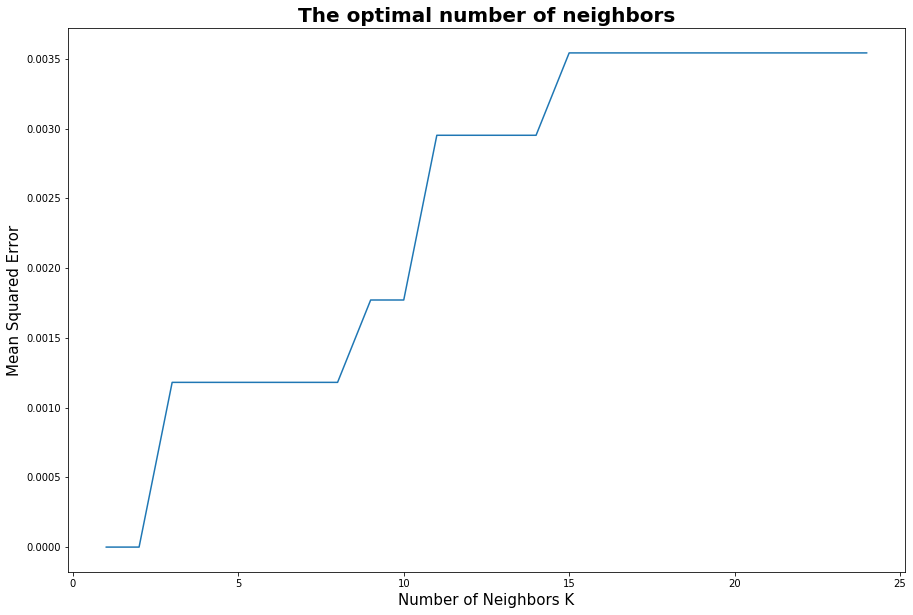

Metrics
---------
f1 score = 1.0
Prediction accuracy = 1.0
Precision score = 1.0
Confusion Matrix
-----------------
[[ 647    0]
 [   0 1047]]


In [11]:
# KNN classifier

k_list = list(range(1,25))
cv_scores = []

# Logging Mean Squared Error for model prediction for K values from 1 to 25
for k in k_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = metrics.mean_squared_error(y_pred, y_test)
    cv_scores.append(error)

# Plotting Mean Squared Error vs. K values 
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Mean Squared Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, cv_scores)

plt.show()

# Fitting model with optimal K value
k_optimal = k_list[np.argmin(cv_scores)]
knn = neighbors.KNeighborsClassifier(n_neighbors=k_optimal)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Metric Scores
f1_score = metrics.f1_score(y_test, y_pred)
prediction_accuracy = metrics.accuracy_score(y_test, y_pred)
precision_score= metrics.precision_score(y_test, y_pred)
print("Metrics")
print("---------")
print('f1 score =', f1_score)
print('Prediction accuracy =', prediction_accuracy)
print('Precision score =', precision_score)

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print("-----------------")
print(confusion_matrix)

## Random Forest Classifier

In [12]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
randForest = RandomForestClassifier(n_estimators=1, random_state=42)
randForest.fit(X_train,y_train)
y_pred = randForest.predict(X_test)

f1_score = metrics.f1_score(y_test, y_pred)
prediction_accuracy = metrics.accuracy_score(y_test, y_pred)
precision_score= metrics.precision_score(y_test, y_pred)
print("Metrics")
print("---------")
print('f1 score =', f1_score)
print('Prediction accuracy =', prediction_accuracy)
print('Precision score =', precision_score)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print("-----------------")
print(confusion_matrix)

Metrics
---------
f1 score = 1.0
Prediction accuracy = 1.0
Precision score = 1.0
Confusion Matrix
-----------------
[[ 647    0]
 [   0 1047]]


Classification is performed using 5 classifiers. For all 5, accuracy is observed to be 100% or nearly 100%. As shown in the TSNE scatter plot above, these classifiers perform really well due to the makeup of the training data. In order to acccurately compare classifiers, we will perform feature selection and reduce the number of attributes that are used to train each classifier. 

# Feature Selection
As an initial test to ensure that accuracy will decrease as the number of attributes decrease, we classify the data using 2 feautures.
We will perform logistic regression and observe the accuracy for the new training data. The odor and cap color attributes are arbitrarily chosen for this purpose.

In [0]:
# Picking some random features to check accuracy
feature_subset = ['odor', 'cap-color']
X1 = df.loc[:, feature_subset]
X1_encoded = pd.get_dummies(X1)

# Scale
Xs1 = preprocessing.scale(X1_encoded)

# Train test split
X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(Xs1, y, test_size=0.2, stratify=y, random_state=0)

In [14]:
# Logistic regression
# Create a logistic regression object
logreg = linear_model.LogisticRegression()

# Fit the training data
logreg.fit(X_train1, y_train1)
y_pred1 = logreg.predict(X_test1)

f1_score = metrics.f1_score(y_test1, y_pred1)
prediction_accuracy = metrics.accuracy_score(y_test1, y_pred1)
precision_score= metrics.precision_score(y_test1, y_pred1)
auc_roc = metrics.roc_auc_score(y_test1, y_pred1)
print('f1 score =', f1_score)
print('Prediction accuracy =', prediction_accuracy)
print('Precision score =', precision_score)
print('Auc =', auc_roc)

confusion_matrix = metrics.confusion_matrix(y_test1, y_pred1)
print(confusion_matrix)


f1 score = 0.9942857142857143
Prediction accuracy = 0.9929140832595217
Precision score = 0.9914529914529915
Auc = 0.9916067783990056
[[425   6]
 [  2 696]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We observe that the accuracy declines when the feature subset is smaller. However, the difference is still trivial to compare classifiers. We will reduce the attribute number until 90% accuracy is observed with logistic regression.  Classifiers are then compared using the newly obtained feature subset. If the accuracy, the f1-score and the precision are sufficiently smaller than 1 we can successfully compare classifiers.

The attributes that have 2 or less unique categorical values are removed from the training data.

In [15]:
atts_to_remove = []

for name in xnames:
  categories = df[name].unique()
  n_categories = len(categories)
  if (n_categories <= 2):
    atts_to_remove.append(name)
  print(name, categories, n_categories)

cap-shape ['x' 'b' 's' 'f' 'k' 'c'] 6
cap-surface ['s' 'y' 'f' 'g'] 4
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'c'] 8
bruises ['t' 'f'] 2
odor ['p' 'a' 'l' 'n' 'f' 'c' 'm'] 7
gill-attachment ['f' 'a'] 2
gill-spacing ['c' 'w'] 2
gill-size ['n' 'b'] 2
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'r' 'y'] 9
stalk-shape ['e' 't'] 2
stalk-root ['e' 'c' 'b' 'r'] 4
stalk-surface-above-ring ['s' 'f' 'k' 'y'] 4
stalk-surface-below-ring ['s' 'f' 'y' 'k'] 4
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'c' 'y'] 7
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'c' 'y'] 7
veil-type ['p'] 1
veil-color ['w' 'y'] 2
ring-number ['o' 't' 'n'] 3
ring-type ['p' 'e' 'l' 'n'] 4
spore-print-color ['k' 'n' 'u' 'h' 'r' 'w'] 6
population ['s' 'n' 'a' 'v' 'y' 'c'] 6
habitat ['u' 'g' 'm' 'd' 'p' 'l'] 6


Here we can see that some feautures only have 2 distinct values. We will remove these features from our training data and observe the change in accuracy for logistic regression.

In [16]:
print('The attributes that have less than 2 possible nominal values: ', atts_to_remove)
xnames1 = []
for name in xnames:
  if name not in atts_to_remove:
    xnames1.append(name)
print('These are the attributes we will keep: ', xnames1)
print('We will keep', len(xnames1), 'attributes out of', len(xnames), '.')


The attributes that have less than 2 possible nominal values:  ['bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape', 'veil-type', 'veil-color']
These are the attributes we will keep:  ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
We will keep 15 attributes out of 22 .


In [0]:
X2 = df.loc[:, xnames1]
X2_encoded = pd.get_dummies(X2)

# Scale
Xs2 = preprocessing.scale(X2_encoded)

# Train test split
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(Xs2, y, test_size=0.2, stratify=y, random_state=10)

In [18]:
# Attempt logistic regression with new feature subset
# Logistic regression
# Create logistic regression object
logreg = linear_model.LogisticRegression()

# Fit the training data
logreg.fit(X_train2, y_train2)

y_pred2 = logreg.predict(X_test2)

f1_score = metrics.f1_score(y_test2, y_pred2)
prediction_accuracy = metrics.accuracy_score(y_test2, y_pred2)
precision_score= metrics.precision_score(y_test2, y_pred2)
auc_roc = metrics.roc_auc_score(y_test2, y_pred2)
print('f1 score =', f1_score)
print('Prediction accuracy =', prediction_accuracy)
print('Precision score =', precision_score)
print('Auc =', auc_roc)

confusion_matrix = metrics.confusion_matrix(y_test2, y_pred2)
print(confusion_matrix)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


f1 score = 1.0
Prediction accuracy = 1.0
Precision score = 1.0
Auc = 1.0
[[431   0]
 [  0 698]]


Our smaller feature subset still yields an accuracy of 100% where all instances are classified as either true positive or true negative. We will now further diminish our feature subset so that we reach an accuracy of 90% using logistic regression.
Our initial goal is to achieve this with 10 attributes. After running the code below, for the combination of (15,10), over 3003 possible conditions, we can't find a subset of 10 attributes that yields around 90% accuracy. In our next attempt, we decrease the attribute number to 9 and run the exhaustive search again.

In [19]:
from itertools import combinations
import warnings
combs = list(combinations(xnames1, 9))

i=1
possible_subsets = []
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  for xnames2 in combs:
    X = df.loc[:, xnames2]
    X = pd.get_dummies(X)
    Xs = preprocessing.scale(X)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(Xs, y, test_size=0.2, stratify=y, random_state=i)
    logreg = linear_model.LogisticRegression(solver='lbfgs', verbose=0)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    prediction_accuracy = metrics.accuracy_score(y_test, y_pred)
    if (prediction_accuracy < 0.91):
      print(i)
      print(xnames2)
      print('Prediction accuracy = ', prediction_accuracy)
      print()
      possible_subsets.append((i, xnames2, prediction_accuracy))
    i +=1

    

556
('cap-shape', 'cap-surface', 'cap-color', 'gill-color', 'stalk-root', 'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number', 'population')
Prediction accuracy =  0.8919397697077059

589
('cap-shape', 'cap-surface', 'cap-color', 'gill-color', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number')
Prediction accuracy =  0.8919397697077059

1387
('cap-shape', 'cap-surface', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number')
Prediction accuracy =  0.9016829052258636

1404
('cap-shape', 'cap-surface', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-below-ring', 'ring-number', 'population')
Prediction accuracy =  0.9096545615589017

1515
('cap-shape', 'cap-surface', 'gill-color', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 's

This time, over 5005 possible combinations of subsets of 9 elements, we find the  subsets that yield an accuracy of around 90%. For each train test split, the random state variable is recorded in order to reproduce the split in the future.

In [20]:
for subset in possible_subsets:
  print('random_state =', subset[0])
  print('Attribute names:', subset[1])
  print('Prediction accuracy =', subset[2])

random_state = 556
Attribute names: ('cap-shape', 'cap-surface', 'cap-color', 'gill-color', 'stalk-root', 'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number', 'population')
Prediction accuracy = 0.8919397697077059
random_state = 589
Attribute names: ('cap-shape', 'cap-surface', 'cap-color', 'gill-color', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number')
Prediction accuracy = 0.8919397697077059
random_state = 1387
Attribute names: ('cap-shape', 'cap-surface', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number')
Prediction accuracy = 0.9016829052258636
random_state = 1404
Attribute names: ('cap-shape', 'cap-surface', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-below-ring', 'ring-number', 'population')
Prediction accuracy = 0.9096545615589017
random_state

In [21]:
names = possible_subsets[0][1]
random_state = possible_subsets[0][0]
X3 = df.loc[:, names]
X3_encoded = pd.get_dummies(X3)

# Scale
Xs3 = preprocessing.scale(X3_encoded)

# Train test split
X_train3, X_test3, y_train3, y_test3 = model_selection.train_test_split(Xs3, y, test_size=0.2, stratify=y, random_state=random_state)

# Attempt logistic regression with new feature subset
# Logistic regression
logreg = linear_model.LogisticRegression()
logreg.fit(X_train3, y_train3)
y_pred3 = logreg.predict(X_test3)

f1_score = metrics.f1_score(y_test3, y_pred3)
prediction_accuracy = metrics.accuracy_score(y_test3, y_pred3)
precision_score= metrics.precision_score(y_test3, y_pred3)
auc_roc = metrics.roc_auc_score(y_test3, y_pred3)
print('f1 score =', f1_score)
print('Prediction accuracy =', prediction_accuracy)
print('Precision score =', precision_score)
print('Auc =', auc_roc)

confusion_matrix = metrics.confusion_matrix(y_test3, y_pred3)
print(confusion_matrix)


f1 score = 0.9132290184921764
Prediction accuracy = 0.8919397697077059
Precision score = 0.9067796610169492
Auc = 0.8833192615294612
[[365  66]
 [ 56 642]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We can now compare our classifiers with this subset of features in order to determine the best classifier for this problem.

# Visual Exploratory Data Analysis of Selected Features

In [0]:
# Preprocessed dataframe for TSNE scatter plot
model = TSNE(learning_rate = 100)
tsne_data = model.fit_transform(X3_encoded.values)
tsne_x = tsne_data[:,0]
tsne_y = tsne_data[:,1]
df_TSNE = pd.DataFrame({"x" : tsne_x, "y" : tsne_y})

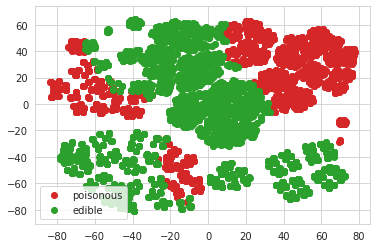

In [37]:
# TSNE scatter plot using matplotlib
plt.scatter(df_TSNE.loc[y==0]['x'], df_TSNE.loc[y ==0]['y'], c= 'tab:red')
plt.scatter(df_TSNE.loc[y ==1]['x'], df_TSNE.loc[y ==1]['y'], c= 'tab:green')
plt.legend(loc ='lower left', labels = ['poisonous', 'edible'])
plt.show()

The t-SNE scatter plot with reduced features indicates clusters with less seperable boundries. We therefore anticipate that none of the classifiers will be able to achieve zero misclassifications with the provided feature subset.

# Classifier Comparison Using Selected Features
We create a log variable and collect metrics from the testing performance of classifiers. We will use this data in the results section to compare the classifiers.

In [0]:
#log list to store metric log dictionaries of classifiers
log = []

## Logistic Regression

In [39]:
# Logistic regression
logreg = linear_model.LogisticRegression()
logreg.fit(X_train3, y_train3)
y_pred3 = logreg.predict(X_test3)

# Getting metric scores
f1_score = metrics.f1_score(y_test3, y_pred3)
prediction_accuracy = metrics.accuracy_score(y_test3, y_pred3)
precision_score = metrics.precision_score(y_test3, y_pred3)
auc_roc = metrics.roc_auc_score(y_test3, y_pred3)
confusion_matrix = metrics.confusion_matrix(y_test3, y_pred3)

# Logging metric scores
logistic_log = {"classifier" : "Logistic Regression", "f1" : f1_score, "accuracy" : prediction_accuracy , "precision" : precision_score, "confusion" : confusion_matrix}
log.append(logistic_log)

# Printing metrics
print("Metrics")
print("---------")
print('f1 score =', f1_score)
print('Prediction accuracy =', prediction_accuracy)
print('Precision score =', precision_score)
print('Auc =', auc_roc)

Metrics
---------
f1 score = 0.9132290184921764
Prediction accuracy = 0.8919397697077059
Precision score = 0.9067796610169492
Auc = 0.8833192615294612


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## SVM Classification

In [40]:
# SVM classification
from sklearn import svm
# create a support vector classifier
svc = svm.SVC(kernel='rbf', C=1)
svc.fit(X_train3, y_train3)
# Accuracy on the test data
y_pred3 = svc.predict(X_test3)

# Getting metric scores
f1_score = metrics.f1_score(y_test3, y_pred3)
prediction_accuracy = metrics.accuracy_score(y_test3, y_pred3)
precision_score = metrics.precision_score(y_test3, y_pred3)
confusion_matrix = metrics.confusion_matrix(y_test3, y_pred3)

# Logging metric scores
svm_log = {"classifier" : "SVM", "f1" : f1_score, "accuracy" : prediction_accuracy , "precision" : precision_score, "confusion" : confusion_matrix}
log.append(svm_log)

# Printing metrics
print("Metrics")
print("---------")
print('f1 score =', f1_score)
print('Prediction accuracy =', prediction_accuracy)
print('Precision score =', precision_score)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Metrics
---------
f1 score = 0.9822820694542876
Prediction accuracy = 0.9778565101860053
Precision score = 0.9719495091164095


## Decision Tree

In [41]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier()
decTree.fit(X_train3, y_train3)
y_pred3 = decTree.predict(X_test3)

# Getting metric scores
f1_score = metrics.f1_score(y_test3, y_pred3)
prediction_accuracy = metrics.accuracy_score(y_test3, y_pred3)
precision_score = metrics.precision_score(y_test3, y_pred3)
confusion_matrix = metrics.confusion_matrix(y_test3, y_pred3)

# Logging metric scores
decision_log = {"classifier" : "Decision Tree", "f1" : f1_score, "accuracy" : prediction_accuracy , "precision" : precision_score, "confusion" : confusion_matrix}
log.append(decision_log)

# Printing metrics
print("Metrics")
print("---------")
print('f1 score = ', f1_score)
print('Prediction accuracy = ', prediction_accuracy)
print('Precision score = ', precision_score)

Metrics
---------
f1 score =  0.978386167146974
Prediction accuracy =  0.9734278122232064
Precision score =  0.9840579710144928


## KNN Classifier

<Figure size 432x288 with 0 Axes>

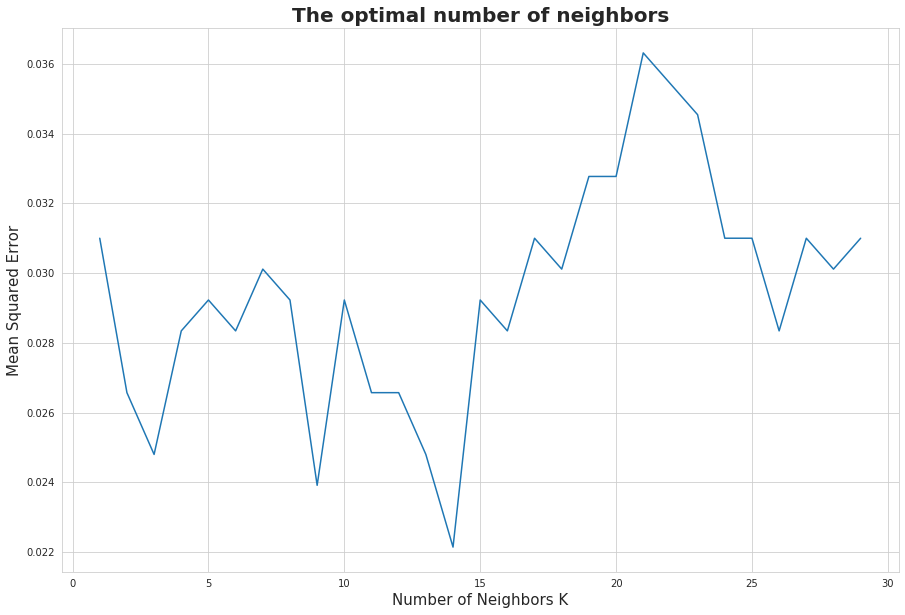

Metrics
---------
f1 score = 0.9821556031406139
Prediction accuracy = 0.9778565101860053
Precision score = 0.9786628733997155


In [42]:
# KNN classifier

k_list = list(range(1, 30))
cv_scores = []

# Logging Mean Squared Error for model prediction for K values from 1 to 25
for k in k_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train3, y_train3)
    y_pred3 = knn.predict(X_test3)
    error = metrics.mean_squared_error(y_pred3, y_test3)
    cv_scores.append(error)

# Plotting Mean Squared Error vs. K values 
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Mean Squared Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, cv_scores)
plt.show()

# Fitting and testing model with optimal K value
k_optimal = k_list[np.argmin(cv_scores)]
knn = neighbors.KNeighborsClassifier(n_neighbors=k_optimal)
knn.fit(X_train3, y_train3)
y_pred3 = knn.predict(X_test3)

# Getting metric scores
f1_score = metrics.f1_score(y_test3, y_pred3)
prediction_accuracy = metrics.accuracy_score(y_test3, y_pred3)
precision_score = metrics.precision_score(y_test3, y_pred3)
confusion_matrix = metrics.confusion_matrix(y_test3, y_pred3)

# Logging metric scores
knn_log = {"classifier" : "KNN", "f1" : f1_score, "accuracy" : prediction_accuracy , "precision" : precision_score, "confusion" : confusion_matrix}
log.append(knn_log)

# Printing metrics
print("Metrics")
print("---------")
print('f1 score =', f1_score)
print('Prediction accuracy =', prediction_accuracy)
print('Precision score =', precision_score)

We optimize the k value for our KNN by looping over a range of k values from 1 to 30, and by choosing the k value yielding the minimum mean squared error.

## Random Forest Classifier

In [43]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
randForest = RandomForestClassifier(n_estimators=1, random_state=42)
randForest.fit(X_train3, y_train3)
y_pred3 = randForest.predict(X_test3)

# Getting metric scores
f1_score = metrics.f1_score(y_test3, y_pred3)
prediction_accuracy = metrics.accuracy_score(y_test3, y_pred3)
precision_score = metrics.precision_score(y_test3, y_pred3)
confusion_matrix = metrics.confusion_matrix(y_test3, y_pred3)

# Logging metric scores
forest_log = {"classifier" : "Random Forest", "f1" : f1_score, "accuracy" : prediction_accuracy , "precision" : precision_score, "confusion" : confusion_matrix}
log.append(forest_log)

# Printing metrics
print("Metrics")
print("---------")
print('f1 score =', f1_score)
print('Prediction accuracy =', prediction_accuracy)
print('Precision score =', precision_score)

Metrics
---------
f1 score = 0.9667630057803468
Prediction accuracy = 0.9592559787422498
Precision score = 0.9752186588921283


# Results
We gather the following data after testing the performance of the five classifiers on the dataset with reduced features.

In [44]:
classifiers = []
f1_score_lst = []
accuracy_lst = []
precision_lst = []
false_positive_lst = []
false_negative_lst = []
for classification_log in log: 
  classifiers.append(classification_log["classifier"])
  f1_score_lst.append(classification_log["f1"])
  accuracy_lst.append(classification_log["accuracy"])
  precision_lst.append(classification_log["precision"])
  false_positive_lst.append(classification_log["confusion"][0][1])
  false_negative_lst.append(classification_log["confusion"][1][0])

print("Classifier with highest f1 score: " + classifiers[np.argmax(f1_score_lst)])
print("Classifier with highest accuracy: " + classifiers[np.argmax(accuracy_lst)])
print("Classifier with highest precision: " + classifiers[np.argmax(precision_lst)])
print("Classifier with lowest false positives: " + classifiers[np.argmin(false_positive_lst)])
print("Classifier with lowest false negatives: " + classifiers[np.argmin(false_negative_lst)])


Classifier with highest f1 score: SVM
Classifier with highest accuracy: SVM
Classifier with highest precision: Decision Tree
Classifier with lowest false positives: Decision Tree
Classifier with lowest false negatives: SVM


## Results Visualized

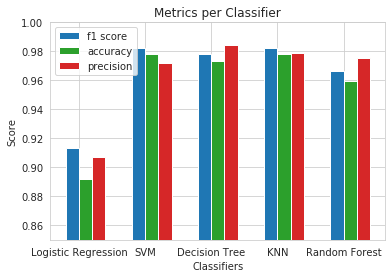

In [45]:
# formatting metrics collected in log
labels = ["f1 score", "accuracy", "precision"]

x = np.arange(len(f1_score_lst))
width = 0.20

fig, axes = plt.subplots(ncols=1, nrows=1)
plt.title('Metrics per Classifier')
plt.xlabel('Classifiers')
plt.ylabel('Score')
axes.bar(x-0.2, f1_score_lst, width=width, align='edge', label=labels[0])
axes.bar(x, accuracy_lst, width=width, align='edge', color=list(plt.rcParams['axes.prop_cycle'])[2]['color'], label=labels[1])
axes.bar(x+0.2, precision_lst, width=width, align='edge', color=list(plt.rcParams['axes.prop_cycle'])[3]['color'], label=labels[2])
axes.set_xticks(x)
axes.set_xticklabels(classifiers)
axes.set_ylim([0.85, 1])
plt.legend()
plt.show()

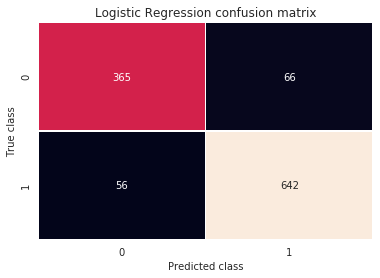

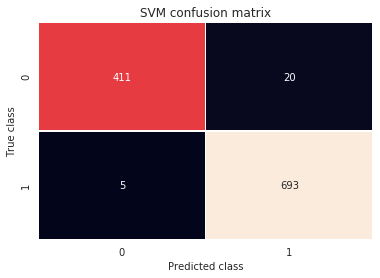

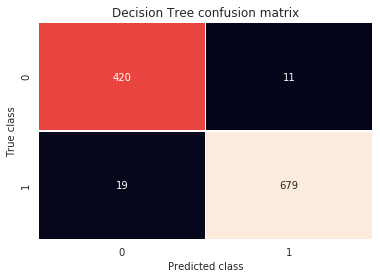

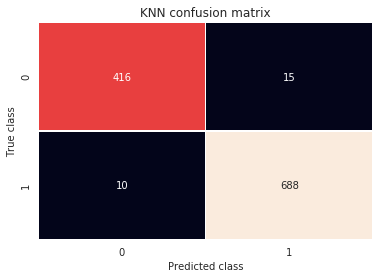

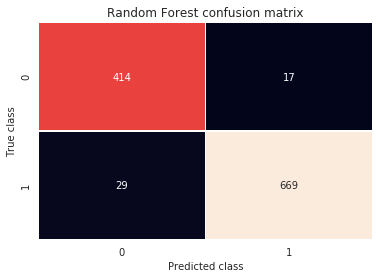

In [46]:
FPRs = []
for i in range(len(log)):
  FP = log[i]['confusion'][0][1]
  TN = log[i]['confusion'][0][0]
  FPR = FP / (FP + TN)
  FPRs.append((log[i]['classifier'], FPR))
  sns.heatmap(log[i]["confusion"], annot = True,  linewidths=.5, cbar =None, fmt='g')
  plt.title(log[i]["classifier"] + " confusion matrix")
  plt.ylabel('True class')
  plt.xlabel('Predicted class');
  plt.show()

In [48]:
highest = 0
lowest = 1
for FPR in FPRs:
  if (FPR[1] > highest):
    highest = FPR[1]
  if (FPR[1] < lowest):
    lowest = FPR[1]
  print(FPR[0], ':', FPR[1])

print('Highest false positive rate =', highest)
print('Lowest false positive rate=', lowest)

Logistic Regression : 0.1531322505800464
SVM : 0.04640371229698376
Decision Tree : 0.025522041763341066
KNN : 0.03480278422273782
Random Forest : 0.03944315545243619
Highest false positive rate = 0.1531322505800464
Lowest false positive rate= 0.025522041763341066


# Conclusion

Given the results calculated above, we conclude that the decision tree classifier and the Support Vector Machine are the classifiers best suited for this dataset with the features we have selected. The logistic regression classifier clearly underperformed, and the relatively lower metrics of the classifier are likely due to the inseparable nature of the clusters as visualized in the t-SNE plot. The primary goal of the classifiers was to reduce the number of false positives, as a false positive would result in a poisonous mushroom being classified as edible. Therefore, the decision tree algorithm is determined to be the best classifier for the given features and dataset.

The lowest false positive rate is obtained for the decision tree classifier. On the other hand, SVM and KNN have the highest F1-scores. However, the f1-score accounts for false negatives as well as false positives; in our case, false positives are more relevant as the consequences of classifying a poisonous mushroom as edible may be deadly. Classifying an edible mushroom as poisonous isn't as important a missclassification for this dataset. 

In conclusion, the decision tree classifier is best suited to classify mushrooms as edible and poisonous in this dataset.

# References

[1]www.kaggle.com/haimfeld87/analysis-and-classification-of-mushrooms

[2]https://archive.ics.uci.edu/ml/datasets/Mushroom

[3] Schlimmer,J.S. (1987). Concept Acquisition Through Representational Adjustment (Technical Report 87-19). Doctoral dissertation, Department of Information and Computer Science, University of California, Irvine.

[4] Iba,W., Wogulis,J., & Langley,P. (1988). Trading off Simplicity and Coverage in Incremental Concept Learning. In Proceedings of the 5th International Conference on Machine Learning, 73-79. Ann Arbor, Michigan: Morgan Kaufmann.

[5] Duch W, Adamczak R, Grabczewski K (1996) Extraction of logical rules from training data using backpropagation networks, in: Proc. of the The 1st Online Workshop on Soft Computing, 19-30.Aug.1996, pp. 25-30.

[6] Duch W, Adamczak R, Grabczewski K, Ishikawa M, Ueda H, Extraction of crisp logical rules using constrained backpropagation networks - comparison of two new approaches, in: Proc. of the European Symposium on Artificial Neural Networks (ESANN'97), Bruge, Belgium 16-18.4.1997.
